# Final Project
## Linear Regression: Prediction on bike sharing demand

In [1]:
# Import

# data set
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# linear regression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

# K fold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import ExtraTreesClassifier

# Error calculation
from sklearn import metrics
%matplotlib inline

### Importing the merged dataset

In [2]:
#dataset = pd.read_csv('Joint_dataframe.csv')

dataset = pd.read_csv(
    'April_to_June_3_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

# exclude timestamp column
#dataset = dataset.loc[:, dataset.columns!='timestamp']

In [3]:
dataset = dataset.drop(['index','is_holiday','is_weekend'], axis = 1)
#dataset = dataset.drop(['index'], axis = 1)
dataset = dataset.dropna(axis=0, how='any')
dataset

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,17,39,2,-22.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.197574,51.4996
2016-04-01,42,24,3,18.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.084606,51.5213
2016-04-01,51,30,4,21.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.120974,51.5301
2016-04-01,44,71,5,-27.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.156876,51.4931
2016-04-01,48,38,6,10.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.144229,51.5181
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-30,1,109,167,-108.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.147624,51.4940
2016-06-30,3,17,168,-14.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.195456,51.5004
2016-06-30,1,30,169,-29.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.165164,51.5147


In [4]:
location = pd.read_csv("Cycle hire docking stations.csv")

In [5]:
#dataset.to_csv (r'C:Desktop\dataframe.csv', index = False, header=True)

### Datasets for each stations

In [6]:
# Extract number of bikes leaving to the station
## for loop with 800 station
## put that info to 800 datasets

obj = dataset.groupby('Station Id')

In [7]:
obj.get_group(1)

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-02,13,22,1,-9.0,10.729167,9.458333,62.125000,14.833333,2.0,-0.109971,51.5292
2016-04-03,27,22,1,5.0,11.562500,11.041667,77.541667,11.312500,3.0,-0.109971,51.5292
2016-04-04,52,20,1,32.0,11.083333,10.500000,77.520833,13.583333,4.0,-0.109971,51.5292
2016-04-05,75,12,1,63.0,11.583333,10.916667,65.708333,14.916667,5.0,-0.109971,51.5292
2016-04-06,41,23,1,18.0,9.500000,7.208333,65.812500,26.437500,6.0,-0.109971,51.5292
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-25,11,9,1,2.0,16.062500,16.062500,73.458333,13.562500,25.0,-0.109971,51.5292
2016-06-26,48,26,1,22.0,16.604167,16.604167,71.145833,19.270833,26.0,-0.109971,51.5292
2016-06-27,23,22,1,1.0,18.062500,18.062500,68.958333,16.041667,27.0,-0.109971,51.5292


In [8]:
# add datasets to list

df = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]

#[35,79,80,179,198,205,237,259,283,285,342,369,385,413,414,415,416,417,418,422,429,434,438,439,493,497,
           #502,525,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df.append(obj.get_group(i))

## Plotting

In [9]:
def plot_graph(y_train, y_test, y_pred, i):
    ## Print heading
    plt.title( 'Station Id: %d' % (i))

    plt.plot(np.arange(0, len(y_train)), y_train, color='green', label="History")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', marker='.', label="Actual")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, color='red', marker='.', label="Prediction")
    plt.ylabel('Bike Count')
    plt.xlabel('Time Step')
    plt.legend()
    plt.show();

## Error calculation

In [10]:
def get_MAE(y_test, y_pred):
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    return MAE

In [11]:
def get_MSE(y_test, y_pred):
    MSE = metrics.mean_squared_error(y_test, y_pred)
    return MSE

In [12]:
def get_RMSE(y_test, y_pred):
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    return RMSE

In [13]:
def get_RMAE(y_test, y_pred):
    RMAE = np.sqrt(metrics.mean_absolute_error(y_test, y_pred))
    return RMAE

In [14]:
def print_error_calculation(y_test, y_pred):

    print('MAE:', get_MAE(y_test, y_pred))
    print('MSE:', get_MSE(y_test, y_pred))
    print('RMSE:', get_RMSE(y_test, y_pred))
    print('RMAE:', get_RMAE(y_test, y_pred))

## Comparison

In [15]:
# determine which error is to be used to compare it with, 
# make an array with that error calculated, 
# work out mean , ... , to determine which method is more appropreiate.

## Linear Regression

In [16]:
def standardize(df):
    normalized_df = (df - df.mean()) / df.std()
    normalized_df
    return normalized_df

In [17]:
df[1]

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,17,39,2,-22.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.197574,51.4996
2016-04-02,11,31,2,-20.0,10.729167,9.458333,62.125000,14.833333,2.0,-0.197574,51.4996
2016-04-03,12,48,2,-36.0,11.562500,11.041667,77.541667,11.312500,3.0,-0.197574,51.4996
2016-04-04,18,33,2,-15.0,11.083333,10.500000,77.520833,13.583333,4.0,-0.197574,51.4996
2016-04-05,61,26,2,35.0,11.583333,10.916667,65.708333,14.916667,5.0,-0.197574,51.4996
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-25,33,35,2,-2.0,16.062500,16.062500,73.458333,13.562500,25.0,-0.197574,51.4996
2016-06-26,73,38,2,35.0,16.604167,16.604167,71.145833,19.270833,26.0,-0.197574,51.4996
2016-06-27,16,39,2,-23.0,18.062500,18.062500,68.958333,16.041667,27.0,-0.197574,51.4996


### Single Linear Regression

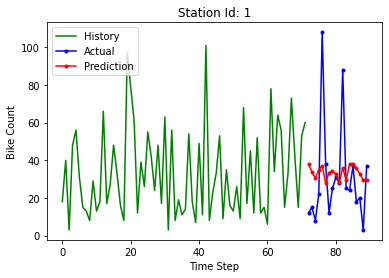

MAE: 18.3365080374043
MSE: 640.5428585342515
RMSE: 25.3089481909907
RMAE: 4.282114902405621


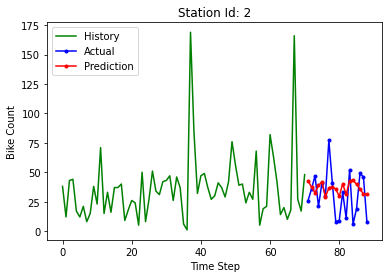

MAE: 16.06661396064258
MSE: 384.276480301769
RMSE: 19.602971211063107
RMAE: 4.008318096239691


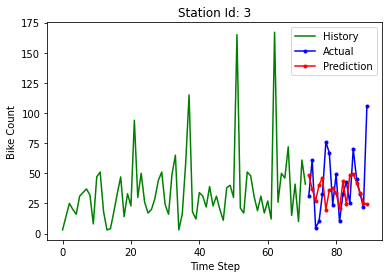

MAE: 22.02548172254331
MSE: 849.799731515282
RMSE: 29.151324695719783
RMAE: 4.693131334465647


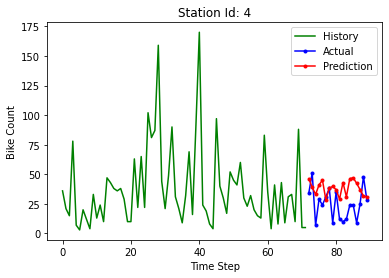

MAE: 16.574287031548444
MSE: 378.8743538715051
RMSE: 19.46469506238166
RMAE: 4.071153034651049


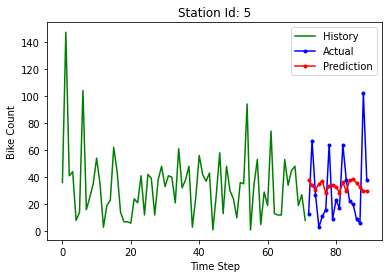

MAE: 22.990175505060428
MSE: 751.4246482249597
RMSE: 27.412125934063553
RMAE: 4.7948071395062835


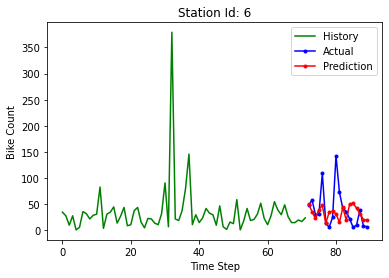

MAE: 26.03734082879969
MSE: 1422.9498431895365
RMSE: 37.722007411980826
RMAE: 5.102679769376057


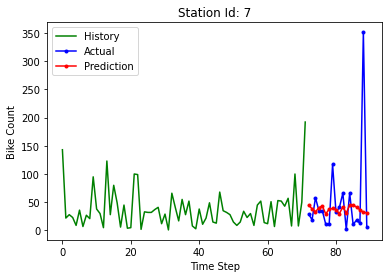

MAE: 39.604166937629905
MSE: 6395.7078056201735
RMSE: 79.97316928583095
RMAE: 6.293184165240193


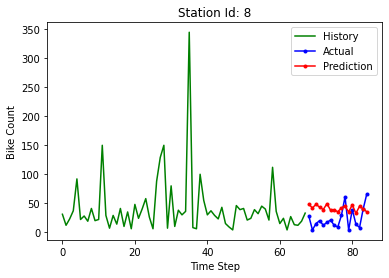

MAE: 23.42268679673822
MSE: 648.6816502139285
RMSE: 25.469229478214068
RMAE: 4.83969903989269


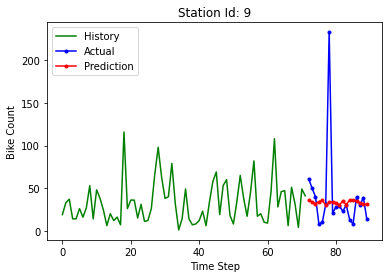

MAE: 23.24193449996777
MSE: 2455.209483406784
RMSE: 49.55007046823227
RMAE: 4.820988954557744

Error Calculation
Average MAE: 20.829919532033465
Average MSE: 1392.746685487819
Average RMSE: 31.365454173847695
Average RMAE: 4.290607643633498


In [18]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

# empty dataframe
df_linear_pred = pd.DataFrame(columns=['prediction'])

for i in range(1, no_station):  
    X = df[i]['date'].values.reshape(-1,1) # reshape to make it two-dimentional
    y = df[i]['In'].values # Predict
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)

    # record prediction in a dataframe
    df_temp_pred = pd.DataFrame(list(y_pred))
    df_temp_pred.columns = ['temp_prediction']
    df_linear_pred = pd.concat([df_linear_pred,df_temp_pred])
    
    plot_graph(y_train, y_test, y_pred, i)

    ## Calculate error
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)
    totalRMAE += get_RMSE(y_test,y_pred)
    totalRMSE += get_RMAE(y_test,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)

### Multiple Linear Regression

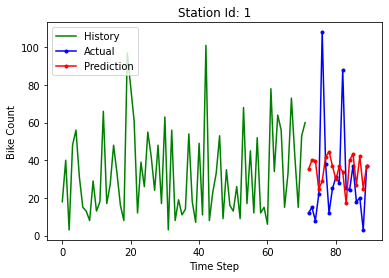

MAE: 19.859531092733793
MSE: 781.9414765854904
RMSE: 27.963216492125692
RMAE: 4.456403380836814


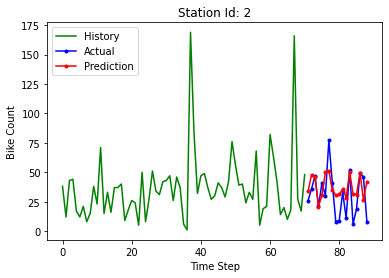

MAE: 13.406169003432707
MSE: 281.8296039464496
RMSE: 16.78778138845183
RMAE: 3.661443568243638


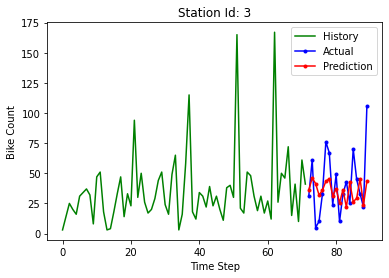

MAE: 19.333490116095618
MSE: 611.8721638851734
RMSE: 24.736049884433317
RMAE: 4.396986481227298


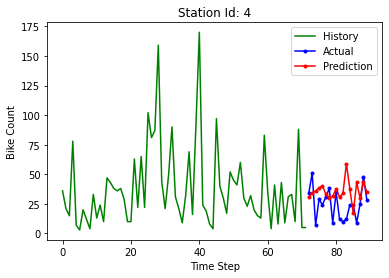

MAE: 15.034031420513259
MSE: 370.9575807970478
RMSE: 19.260259105137912
RMAE: 3.8773742946114007


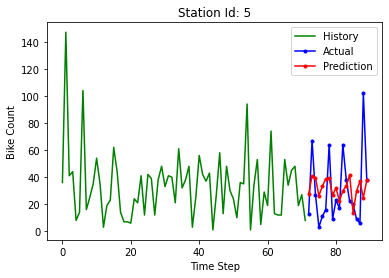

MAE: 20.643638265049926
MSE: 699.218751144786
RMSE: 26.44274477327923
RMAE: 4.5435270732163495


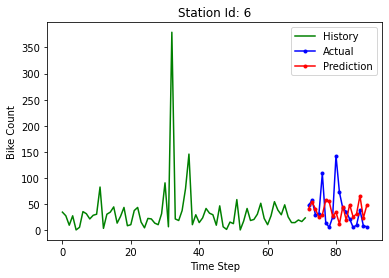

MAE: 30.01758171727436
MSE: 1703.5013015551967
RMSE: 41.27349393442717
RMAE: 5.478830323825913


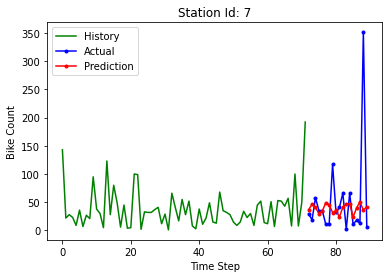

MAE: 41.61914702255576
MSE: 6503.967675815516
RMSE: 80.64718020994606
RMAE: 6.451290337797219


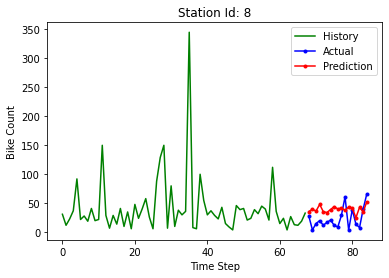

MAE: 21.084764922114637
MSE: 565.1952583932605
RMSE: 23.773835584382688
RMAE: 4.591814992147945


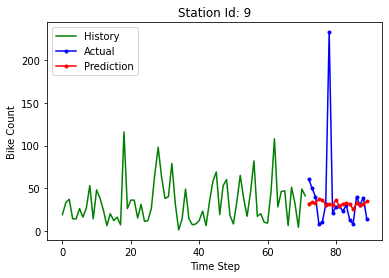

MAE: 22.863570158998765
MSE: 2493.471709820343
RMSE: 49.9346744238945
RMAE: 4.781586573408325

Error Calculation
Average MAE: 20.38619237187688
Average MSE: 1401.1955521943264
Average RMSE: 31.08192357960784
Average RMAE: 4.22392570253149


In [19]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(1, no_station):  
    X = df[i].values[:, 4:8]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df[i].values[:, 0:1] # 'In'
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    #print('Training Features Shape:', X_train.shape, 'station:', i)
    #print('Training Labels Shape:', y_train.shape,'station:', i)
    #print('Testing Features Shape:', X_test.shape,'station:', i)
    #print('Testing Labels Shape:', y_test.shape,'station:', i)
    
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    
    #To retrieve the intercept:
    #print(model.intercept_ ,'station:', i)
    #For retrieving the slope:
    #print(model.coef_ ,'station:', i)
    
    y_pred = regression_model.predict(X_test)
    #linear_df = pd.DataFrame(y_test, y_pred) # list to dataframe (for one station only)
    #station_df.append(linear_df) # append to the datasets that contains all the data for each station

    plot_graph(y_train, y_test, y_pred, i)
    
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)
    totalRMAE += get_RMSE(y_test,y_pred)
    totalRMSE += get_RMAE(y_test,y_pred)

print('')
print('Error Calculation')
    
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)

## K fold 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


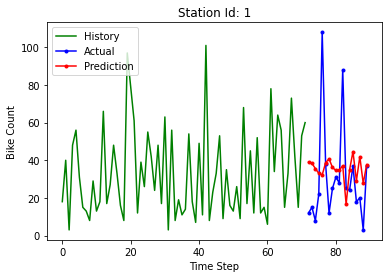

MAE: 19.55793718984528
MSE: 720.7857148481603
RMSE: 26.847452669632556
RMAE: 4.422435662601015
Fitting 5 folds for each of 5 candidates, totalling 25 fits


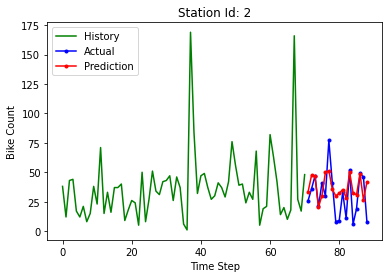

MAE: 13.349870729492416
MSE: 281.91838256317834
RMSE: 16.790425324070213
RMAE: 3.653747491205764
Fitting 5 folds for each of 5 candidates, totalling 25 fits


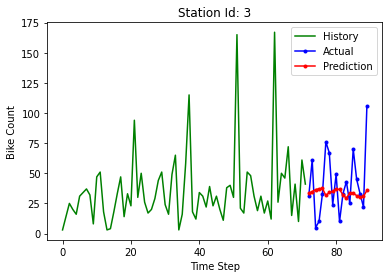

MAE: 20.78293130295535
MSE: 737.3906999118415
RMSE: 27.1549387756968
RMAE: 4.558830036638277
Fitting 5 folds for each of 5 candidates, totalling 25 fits


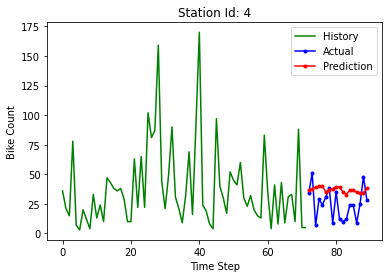

MAE: 15.006721648940093
MSE: 312.4979218545542
RMSE: 17.677610750736488
RMAE: 3.8738510101628965
Fitting 5 folds for each of 5 candidates, totalling 25 fits


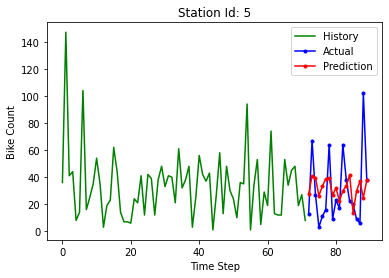

MAE: 20.643638265049912
MSE: 699.2187511447856
RMSE: 26.442744773279223
RMAE: 4.543527073216348
Fitting 5 folds for each of 5 candidates, totalling 25 fits


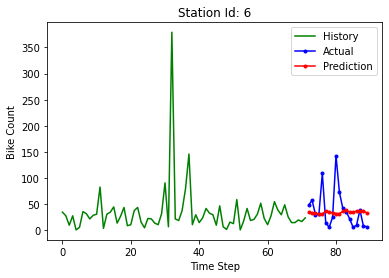

MAE: 25.640060687870402
MSE: 1405.5424808439334
RMSE: 37.4905652243859
RMAE: 5.063601553032229
Fitting 5 folds for each of 5 candidates, totalling 25 fits


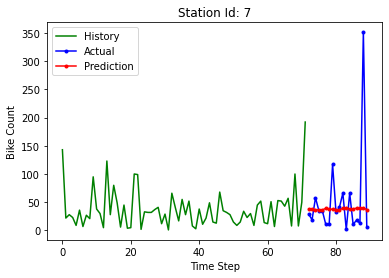

MAE: 39.224357372939124
MSE: 6186.419110701701
RMSE: 78.65379272928739
RMAE: 6.262935204274361
Fitting 5 folds for each of 5 candidates, totalling 25 fits


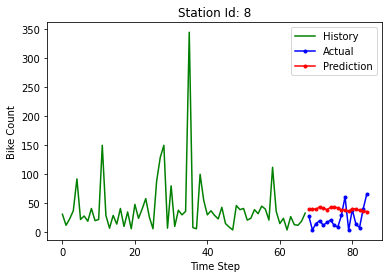

MAE: 22.99078774207234
MSE: 631.3114681190384
RMSE: 25.125912284313944
RMAE: 4.794870982839094
Fitting 5 folds for each of 5 candidates, totalling 25 fits


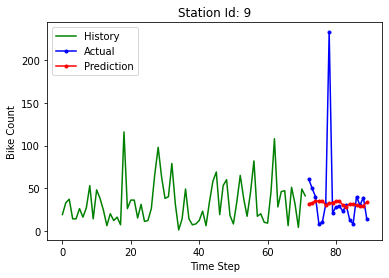

MAE: 23.529297768396024
MSE: 2480.8471068464346
RMSE: 49.808102823199704
RMAE: 4.850700750241765

Error Calculation
Average MAE: 20.072560270756096
Average MSE: 1345.5931636833627
Average RMSE: 30.59915453546022
Average RMAE: 4.202449976421175

Error Calculation
Average MAE: 20.072560270756096
Average MSE: 1345.5931636833627
Average RMSE: 30.59915453546022
Average RMAE: 4.202449976421175


In [20]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

# empty dataframe
df_linear_pred = pd.DataFrame(columns=['prediction'])

for i in range(1, no_station):  
    X = df[i].values[:, 4:8]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df[i]['In'].values # Predict
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # K fold
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import KFold
    from sklearn.feature_selection import RFE
    
    # step-1: create a cross-validation scheme
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)                                           
    #scores = cross_val_score(regression_model, X_train, y_train, scoring='r2', cv=5)

    # step-2: specify range of hyperparameters to tune
    # range (1,6) : 'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    hyper_params = [{'n_features_to_select': list(range(1, 6))}]


    # step-3: perform grid search
    # 3.1 specify model
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    rfe = RFE(regression_model)             

    # 3.2 call GridSearchCV()
    model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

    # fit the model
    model_cv.fit(X_train, y_train)   
    y_pred = model_cv.predict(X_test)
    
    plot_graph(y_train, y_test, y_pred, i)
    
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)
    totalRMAE += get_RMSE(y_test,y_pred)
    totalRMSE += get_RMAE(y_test,y_pred)
    
print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)


In [21]:
df_linear_pred

,prediction


In [22]:
# lists of predicted and actual data for each of the stations
#station_df

- https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
- https://realpython.com/linear-regression-in-python/

# Extra  Tree Classifier

### before feature selection

/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10183/447292511.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


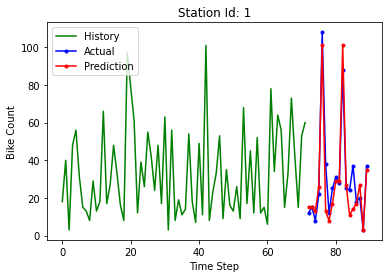

/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10183/447292511.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


MAE: 6.666666666666667
MSE: 96.33333333333333
RMSE: 9.814954576223638
RMAE: 2.581988897471611


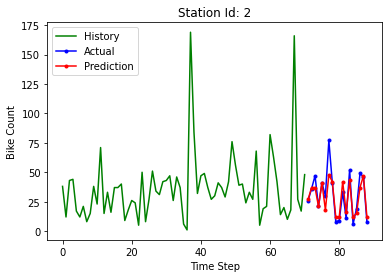

MAE: 6.166666666666667
MSE: 84.05555555555556
RMSE: 9.168181692983378
RMAE: 2.48327740429189


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10183/447292511.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


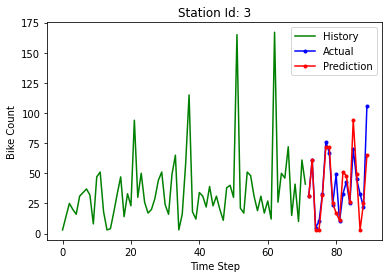

MAE: 9.944444444444445
MSE: 258.5
RMSE: 16.077935190813527
RMAE: 3.1534813214040835


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10183/447292511.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


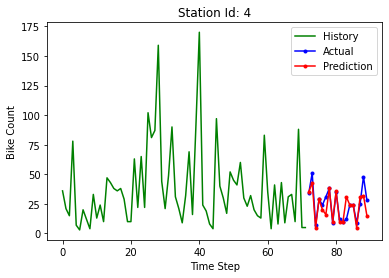

MAE: 5.111111111111111
MSE: 64.11111111111111
RMSE: 8.006941432976209
RMAE: 2.260776661041756


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10183/447292511.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


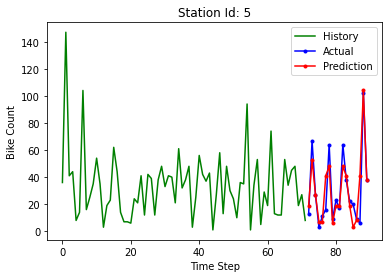

MAE: 8.61111111111111
MSE: 164.83333333333334
RMSE: 12.838743448380505
RMAE: 2.934469476943168


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10183/447292511.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


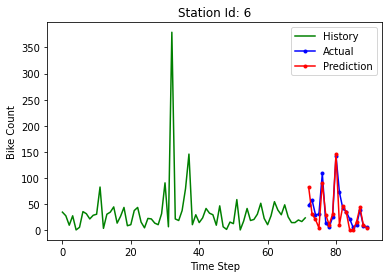

MAE: 14.0
MSE: 429.55555555555554
RMSE: 20.725722075613085
RMAE: 3.7416573867739413


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10183/447292511.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


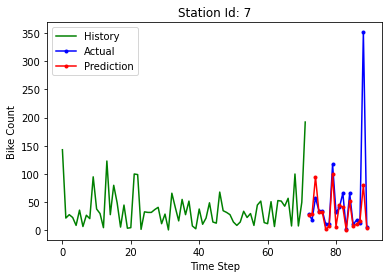

MAE: 24.27777777777778
MSE: 4268.944444444444
RMSE: 65.33715975189344
RMAE: 4.927248499698161


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10183/447292511.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


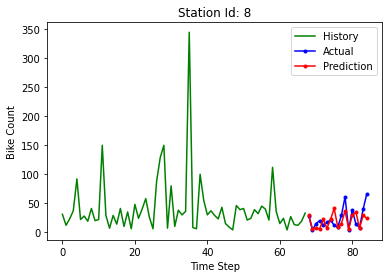

MAE: 11.764705882352942
MSE: 265.29411764705884
RMSE: 16.287851842617517
RMAE: 3.429971702850177


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10183/447292511.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


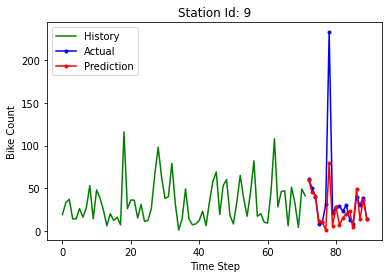

MAE: 16.11111111111111
MSE: 1443.2222222222222
RMSE: 37.989764703433245
RMAE: 4.013864859597431

Error Calculation
Average MAE: 10.265359477124182
Average MSE: 707.4849673202614
Average RMSE: 19.624725471493456
Average RMAE: 2.9526736210072215
Average MAE: 10.265359477124182
Average MSE: 707.4849673202614
Average RMSE: 19.624725471493456
Average RMAE: 2.9526736210072215


In [23]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(1, no_station):  
    X = df[i].values[:, 0:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df[i].values[:, 0:1] # 'In'
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    extraTree_model = ExtraTreesClassifier(n_estimators=8)
    extraTree_model.fit(X_train, y_train)
    
    y_pred = extraTree_model.predict(X_test)
    
    plot_graph(y_train, y_test, y_pred, i)
    
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)
    totalRMAE += get_RMSE(y_test,y_pred)
    totalRMSE += get_RMAE(y_test,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)

### Feature selection

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import ExtraTreesClassifier

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_regression, k=4)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [25]:
df[1]

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,17,39,2,-22.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.197574,51.4996
2016-04-02,11,31,2,-20.0,10.729167,9.458333,62.125000,14.833333,2.0,-0.197574,51.4996
2016-04-03,12,48,2,-36.0,11.562500,11.041667,77.541667,11.312500,3.0,-0.197574,51.4996
2016-04-04,18,33,2,-15.0,11.083333,10.500000,77.520833,13.583333,4.0,-0.197574,51.4996
2016-04-05,61,26,2,35.0,11.583333,10.916667,65.708333,14.916667,5.0,-0.197574,51.4996
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-25,33,35,2,-2.0,16.062500,16.062500,73.458333,13.562500,25.0,-0.197574,51.4996
2016-06-26,73,38,2,35.0,16.604167,16.604167,71.145833,19.270833,26.0,-0.197574,51.4996
2016-06-27,16,39,2,-23.0,18.062500,18.062500,68.958333,16.041667,27.0,-0.197574,51.4996


In [26]:
df[1].values[:, 0:11]

array([[ 17.        ,  39.        ,   2.        , -22.        ,
          8.52083333,   7.89583333,  66.5       ,  11.16666667,
          1.        ,  -0.197574  ,  51.4996    ],
       [ 11.        ,  31.        ,   2.        , -20.        ,
         10.72916667,   9.45833333,  62.125     ,  14.83333333,
          2.        ,  -0.197574  ,  51.4996    ],
       [ 12.        ,  48.        ,   2.        , -36.        ,
         11.5625    ,  11.04166667,  77.54166667,  11.3125    ,
          3.        ,  -0.197574  ,  51.4996    ],
       [ 18.        ,  33.        ,   2.        , -15.        ,
         11.08333333,  10.5       ,  77.52083333,  13.58333333,
          4.        ,  -0.197574  ,  51.4996    ],
       [ 61.        ,  26.        ,   2.        ,  35.        ,
         11.58333333,  10.91666667,  65.70833333,  14.91666667,
          5.        ,  -0.197574  ,  51.4996    ],
       [ 42.        ,  33.        ,   2.        ,   9.        ,
          9.5       ,   7.20833333,  65.8

[0.3899513  0.21497743 0.21365124 0.18142003]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10183/2978449771.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


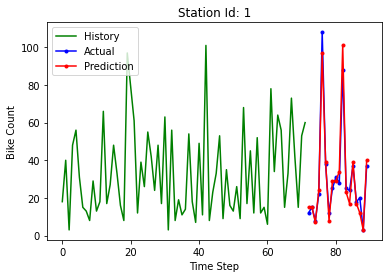

MAE: 3.888888888888889
MSE: 28.22222222222222
RMSE: 5.312459150169742
RMAE: 1.9720265943665387
[0.36769696 0.18747084 0.23451536 0.21031685]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10183/2978449771.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


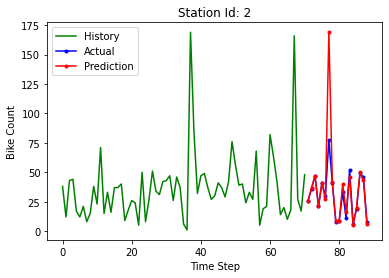

MAE: 6.888888888888889
MSE: 477.8888888888889
RMSE: 21.86066990942613
RMAE: 2.6246692913372702


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.36211143 0.20675454 0.21199866 0.21913536]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10183/2978449771.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


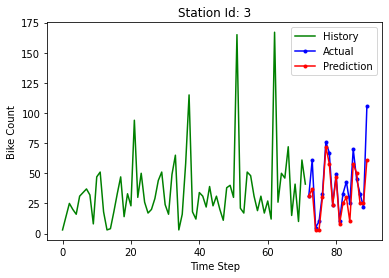

MAE: 9.0
MSE: 192.66666666666666
RMSE: 13.880441875771343
RMAE: 3.0


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10183/2978449771.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


[0.38516837 0.16801348 0.22107273 0.22574542]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


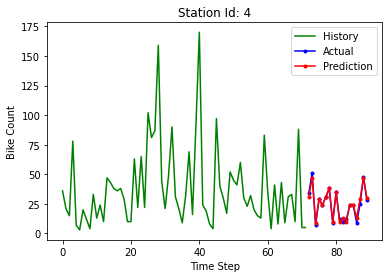

/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 1.5555555555555556
MSE: 4.666666666666667
RMSE: 2.160246899469287
RMAE: 1.247219128924647
[0.32844349 0.23377888 0.22273335 0.21504427]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10183/2978449771.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


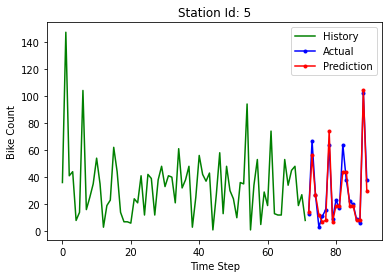

MAE: 5.222222222222222
MSE: 51.44444444444444
RMSE: 7.172478263783337
RMAE: 2.2852182001336816


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10183/2978449771.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


[0.47997374 0.26455734 0.25546893 0.        ]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


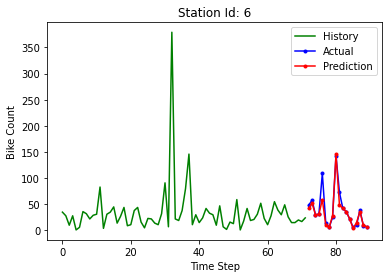

MAE: 5.944444444444445
MSE: 178.94444444444446
RMSE: 13.377011790547412
RMAE: 2.438123139721299


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10183/2978449771.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


[0.41292708 0.25333059 0.15999463 0.17374769]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


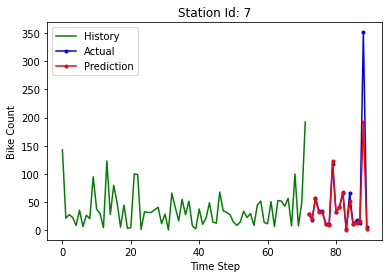

MAE: 11.444444444444445
MSE: 1421.6666666666667
RMSE: 37.704995248198436
RMAE: 3.3829638550307397


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10183/2978449771.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


[0.38111197 0.24783847 0.1847358  0.18631376]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


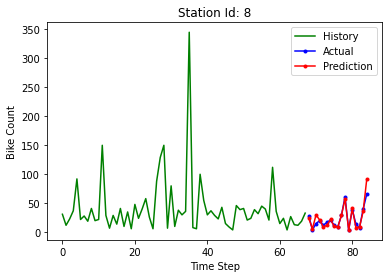

MAE: 4.411764705882353
MSE: 60.411764705882355
RMSE: 7.7725005439615344
RMAE: 2.100420126042015


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.47244391 0.25233171 0.         0.27522439]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_10183/2978449771.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


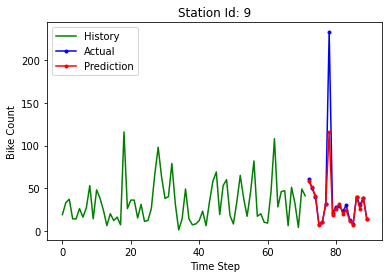

MAE: 8.222222222222221
MSE: 766.0
RMSE: 27.676705006196094
RMAE: 2.8674417556808756

Error Calculation
Average MAE: 5.657843137254902
Average MSE: 318.19117647058823
Average RMSE: 13.691750868752333
Average RMAE: 2.1918082091237068


In [27]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(1, no_station):  
    X = df[i].values[:, 0:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df[i].values[:, 0:1] # 'In'
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # feature selection
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
    
    extraTree_model = ExtraTreesClassifier(n_estimators=8)
    extraTree_model.fit(X_train_fs, y_train)
    print(extraTree_model.feature_importances_)
        
    for feat, importance in zip(df[1].columns, extraTree_model.feature_importances_):
        print ('feature: ',feat) 
    
    
    y_pred = extraTree_model.predict(X_test_fs)
    
    plot_graph(y_train, y_test, y_pred, i)

    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)
    totalRMAE += get_RMSE(y_test,y_pred)
    totalRMSE += get_RMAE(y_test,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)